# Practical Implementation of Artificial Neural Networks

## Introduction to Keras and Tensorflow -

**TensorFlow** is an end-to-end open-source deep learning framework developed by Google. It allows you to build and train machine learning and deep learning models at scale.
Core Features:
- Scalability: TensorFlow can run on CPUs, GPUs, and TPUs, making it suitable for large-scale applications.
- Flexibility: Supports low-level API for custom model building.
- High-Performance: Optimized for distributed training and serving.

**Keras** is a high-level API built on top of TensorFlow. It provides an easy-to-use interface for building and training neural networks.
Core Features:
- User-Friendly: Simplifies the process of building and deploying models.
- Modular: Layers, models, optimizers, and metrics are modular components.
- Prebuilt Layers: Includes common layers like Dense, Conv2D, and LSTM.

**Relationship Between TensorFlow and Keras**
Keras is now part of TensorFlow - Starting from TensorFlow 2.0, Keras is integrated directly into TensorFlow as tf.keras.
You can use tf.keras for high-level, user-friendly APIs to define and train models.


## Installations -

For given practise notebook, please make following installations. These require Python 3.7 and higher.
- pip install tensorflow
- pip install matplotlib

## Use Case -

**Handwritten Digit Classification**
- This is a classification use case for recognizing handwritten digits from the MNIST dataset. 
- This dataset contains 70,000 grayscale images of handwritten digits (0-9) with 28x28 pixel resolution. 
- This problem is simple yet powerful enough to showcase how ANNs work and how they can be implemented using Keras/TensorFlow.

In [2]:
### Import Libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000, 10)


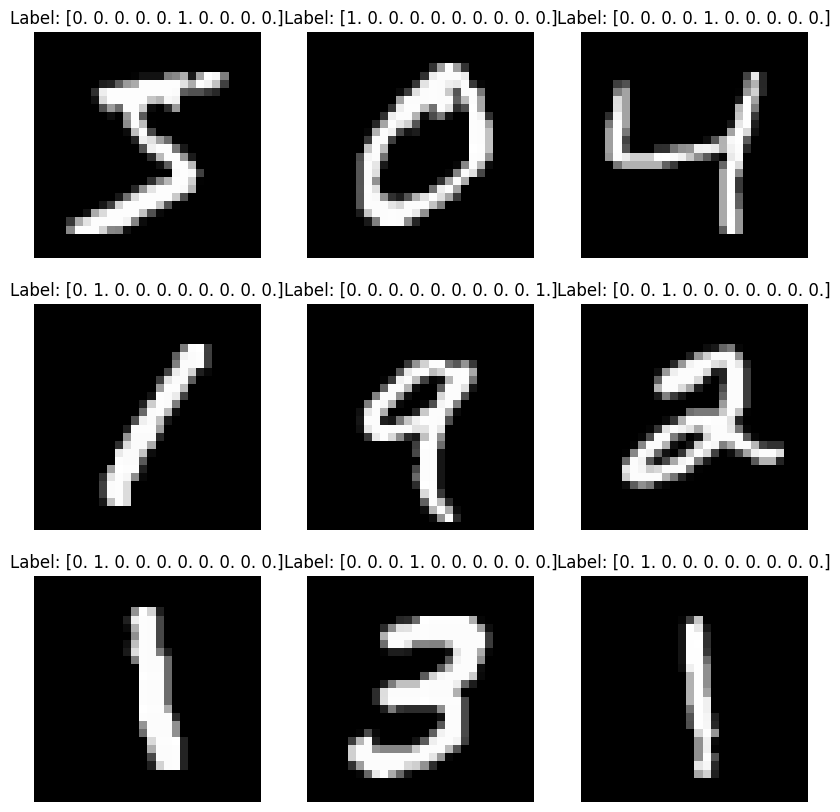

In [4]:
# Plot the first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


In [5]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into a 1D array
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    Dense(64, activation='relu'),   # Fully connected layer with 64 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons for 10 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

c:\Users\JQ886SY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,  # Number of epochs
    batch_size=32,  # Batch size
    validation_split=0.2  # Use 20% of training data for validation
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8681 - loss: 0.4591 - val_accuracy: 0.9588 - val_loss: 0.1394
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9645 - loss: 0.1177 - val_accuracy: 0.9642 - val_loss: 0.1204
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9733 - loss: 0.0822 - val_accuracy: 0.9709 - val_loss: 0.0965
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9832 - loss: 0.0537 - val_accuracy: 0.9713 - val_loss: 0.0997
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9870 - loss: 0.0409 - val_accuracy: 0.9679 - val_loss: 0.1056
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9899 - loss: 0.0319 - val_accuracy: 0.9737 - val_loss: 0.0966
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9907 - loss: 0.0274 - val_accuracy: 0.9748 - val_loss: 0.0875
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9934 - loss: 0.0211 - 

In [7]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 - 1s - 2ms/step - accuracy: 0.9773 - loss: 0.0905
Test Accuracy: 97.73%


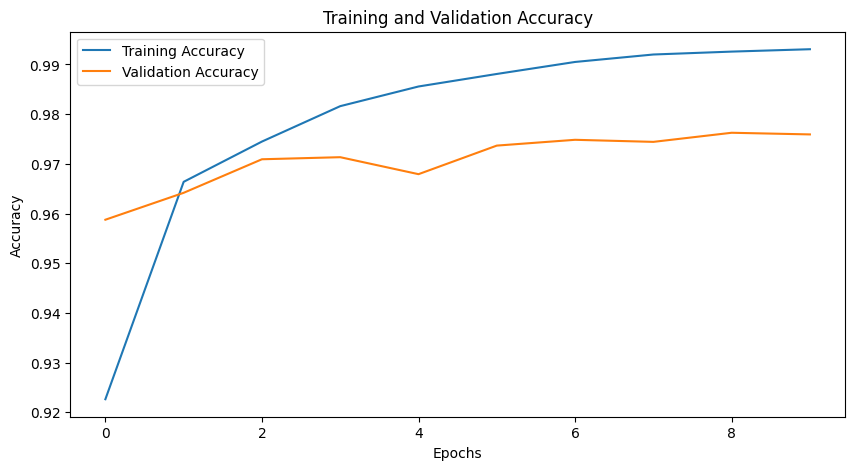

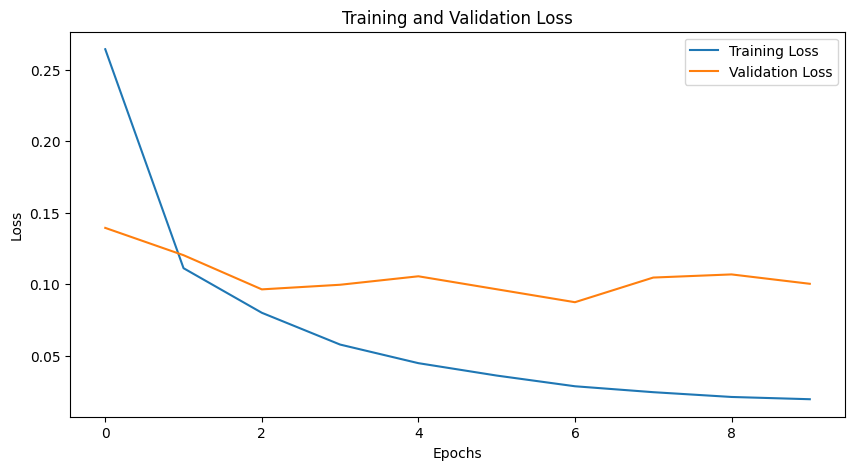

In [8]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


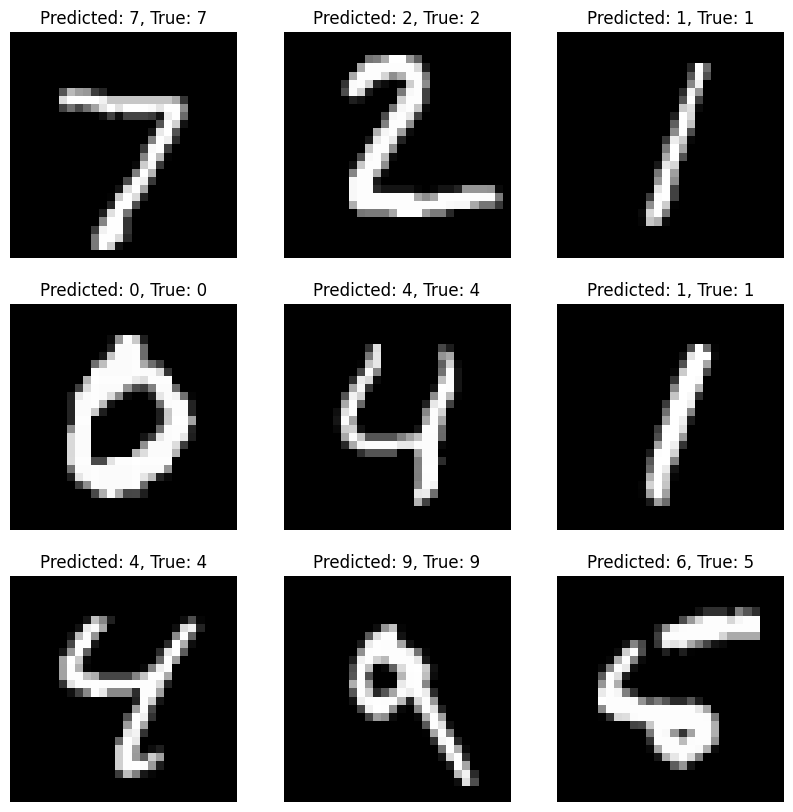

In [9]:
# Make predictions on the test dataset
predictions = model.predict(x_test)

# Display some predictions with their true labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i], cmap="gray")
    plt.title(f"Predicted: {tf.argmax(predictions[i]).numpy()}, True: {tf.argmax(y_test[i]).numpy()}")
    plt.axis("off")
plt.show()